In [141]:
import pandas as pd

In [142]:
df = pd.read_csv("CarPrice.csv")

In [143]:
df.info()
#as we see we have some columns with object Dtype and 16 columns with numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [144]:
df.describe()
# here we have statistical data from our df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [145]:
df.isna().sum()
#as we see we dont have any nan values or missing data

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [146]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

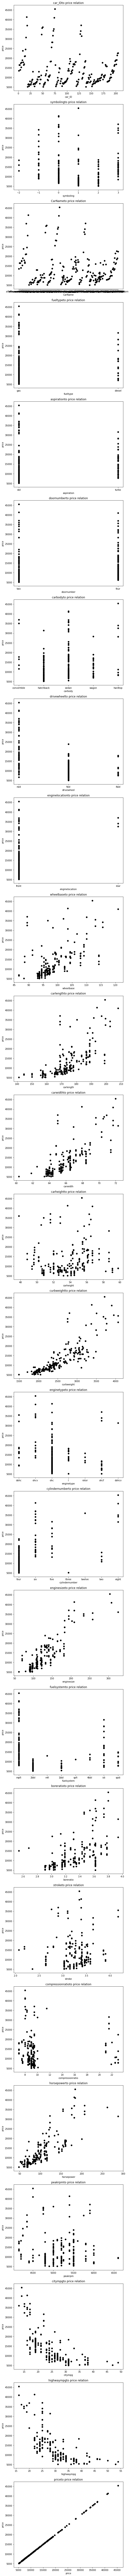

In [147]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(8, 6*len(df.columns)))

for i, col in enumerate(df.columns):
    axes[i].scatter( df[col] , df["price"] , c="Black", alpha=1, marker="o",
           label="Luck")
    axes[i].set_title(col + 'to price' + " relation")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("price")

plt.tight_layout()
plt.show()

In these scatter plots, we're visualizing the relationship between each feature and the price column. we'll want to look for patterns that suggest a linear or nonlinear relationship. The feature that would be the best for predicting the price using a linear regression model is the one that shows a clear, linear trend in the scatter plot.

After examining the resulted scatter plots, we're about to identify the feature that seems to have the strongest linear correlation with the price column. This feature would be a good candidate for predicting price using a linear regression model because it suggests a clear linear trend in the data.<br>
* Based on the discussions so far, 'horsepower' and 'enginesize' seem to be proper features for predicting the price using a linear regression model.

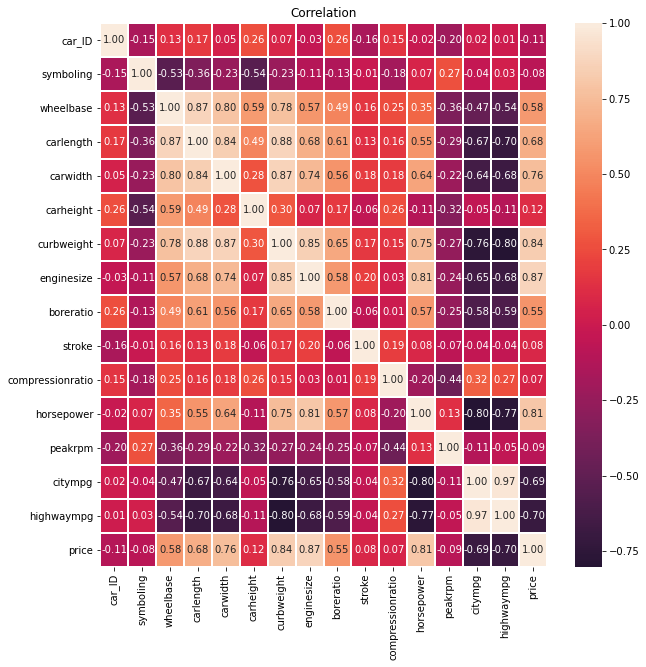

In [148]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, center=0 , fmt=".2f" , cmap = "rocket" , linewidth=1)
plt.title('Correlation')
plt.show()

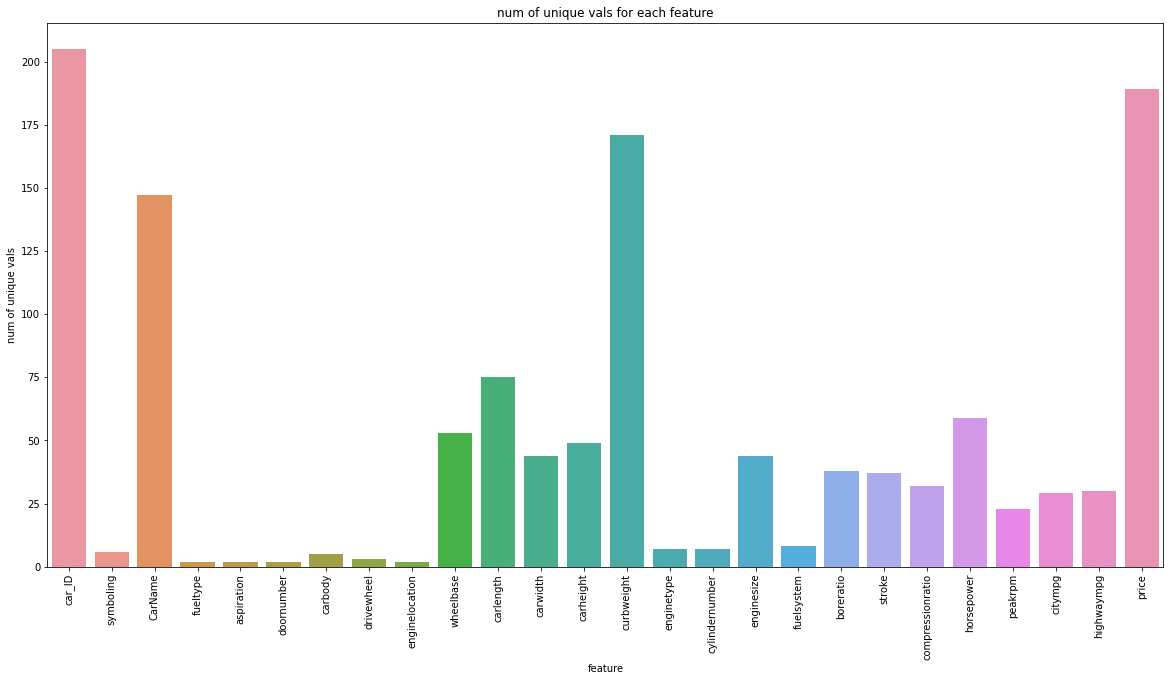

In [149]:
plt.figure(figsize=(20,10))
nu = df.nunique().reset_index()
plt.title("num of unique vals for each feature")
plt.xticks(rotation = 90)
nu.columns = ['feature','num of unique vals']
ax = sns.barplot(x='feature', y='num of unique vals', data=nu)

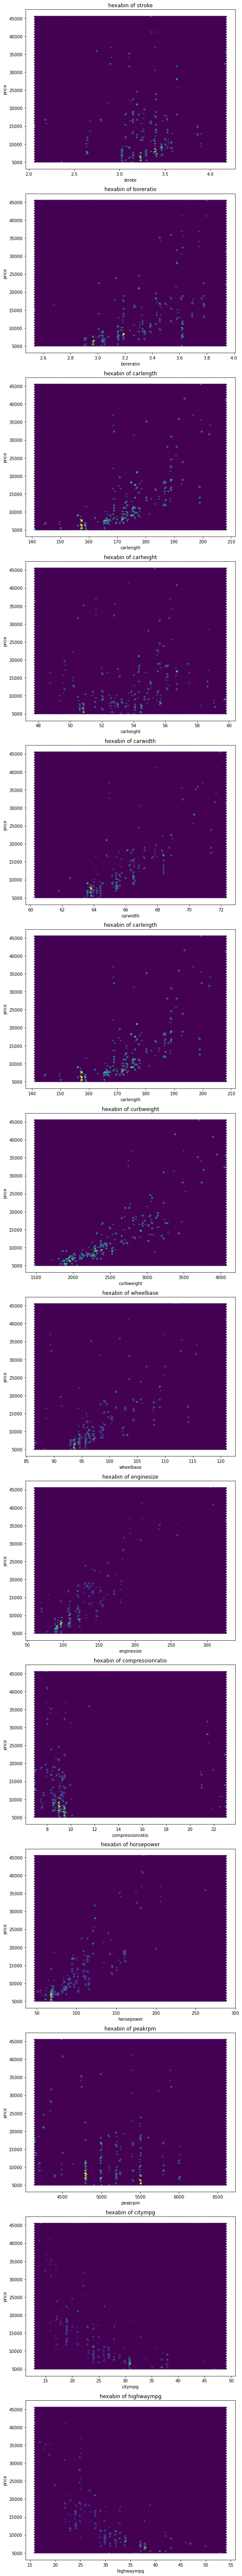

In [150]:
num_col = ["stroke" , "boreratio", "carlength" ,"carheight","carwidth","carlength" , "curbweight", "wheelbase" , "enginesize" , "compressionratio" , "horsepower" , "peakrpm" , "citympg" , "highwaympg"]

fig, axes = plt.subplots(nrows=len(num_col), ncols=1, figsize=(8, 6*len(num_col)))

for i, col in enumerate(df[num_col]):
    axes[i].hexbin( df[col] , df["price"] )
    axes[i].set_title("hexabin of " + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("price")

plt.tight_layout()
plt.show()

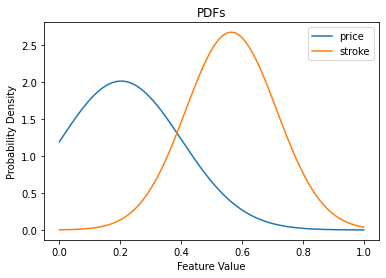

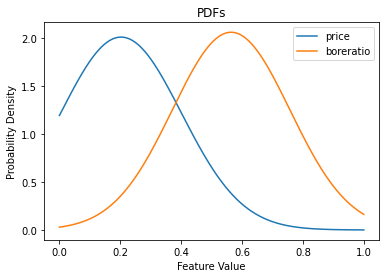

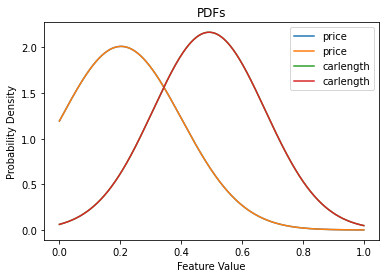

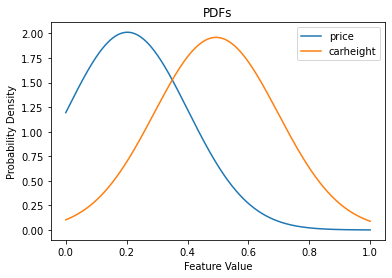

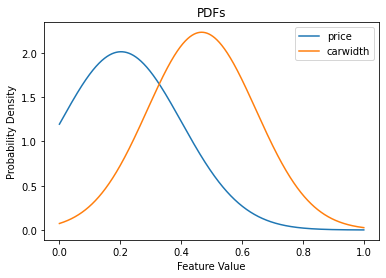

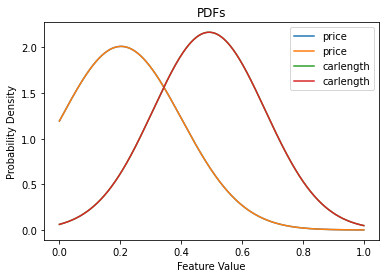

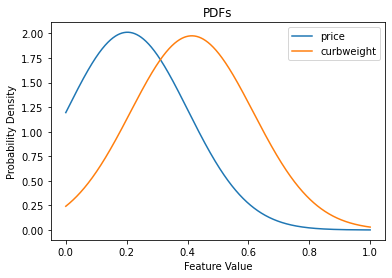

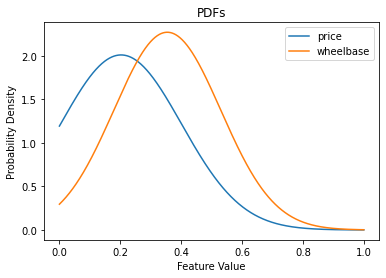

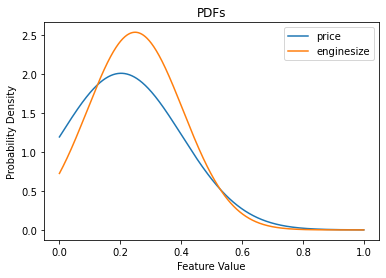

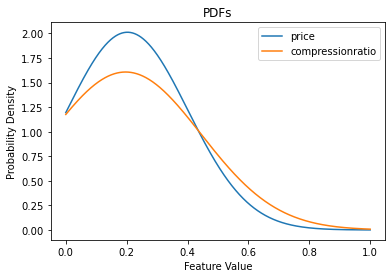

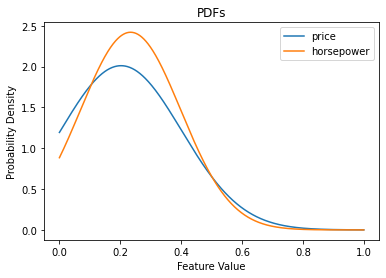

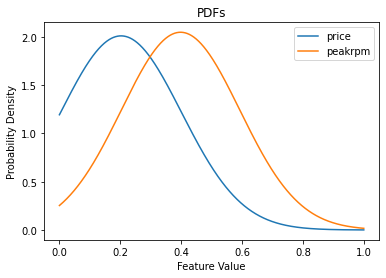

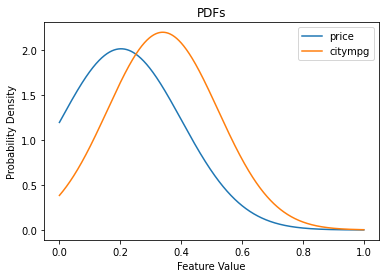

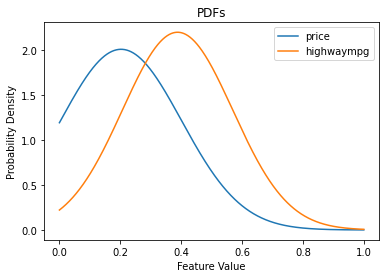

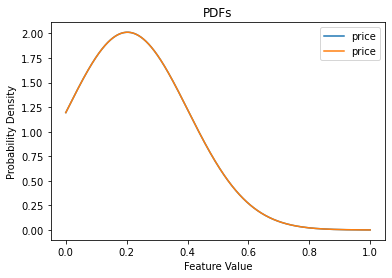

In [151]:
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
num_col.append("price")
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[num_col].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=num_col)
pmean = df_scaled["price"].mean()
pstd = df_scaled["price"].std()
for f in num_col:
    plt.figure()
    fmean = df_scaled[f].mean()
    fstd = df_scaled[f].std()

    x = np.linspace(df_scaled[f].min(), df_scaled[f].max(), 1000)
    pdf_p = norm.pdf(x, pmean, pstd)
    pdf_f = norm.pdf(x, fmean, fstd)

    plt.plot(x, pdf_p, label= "price")
    plt.plot(x, pdf_f, label=f'{f}')

    plt.title('PDFs')
    plt.xlabel('Feature Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

In [152]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

as we saw all features have no null values

And that's why we don't have any missing values, but if we had missing values, we could use the fillna method to fill the values ​​with the average or median or mode of the data. It is also sometimes possible to delete some data or fill it with a worthless value

In the previous section, we scaled the data using the minmaxscaler method, because the large size of a feature is actually a very large coefficient in calculating the value of the cost function, which makes the effect of the unscaled feature on the data more.

In regression, it is often recommended to scale the features so that the predictors have a mean of 0. This makes it easier to interpret the intercept term as the expected value of Y when the predictor values are set to their means.

In [153]:
df_scaled = df_scaled.reset_index(drop=True)
df = df.reset_index(drop=True)
df = pd.concat([df_scaled ,df[df.columns.drop(num_col)]] , axis = 1)

In [154]:
df

,stroke,boreratio,carlength,carheight,carwidth,carlength,curbweight,wheelbase,enginesize,compressionratio,...,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,0.290476,0.664286,0.413433,0.083333,0.316667,0.413433,0.411171,0.058309,0.260377,0.12500,...,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,0.290476,0.664286,0.413433,0.083333,0.316667,0.413433,0.411171,0.058309,0.260377,0.12500,...,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,0.666667,0.100000,0.449254,0.383333,0.433333,0.449254,0.517843,0.230321,0.343396,0.12500,...,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,0.633333,0.464286,0.529851,0.541667,0.491667,0.529851,0.329325,0.384840,0.181132,0.18750,...,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,0.633333,0.464286,0.529851,0.541667,0.508333,0.529851,0.518231,0.373178,0.283019,0.06250,...,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.514286,0.885714,0.711940,0.641667,0.716667,0.711940,0.567882,0.655977,0.301887,0.15625,...,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,0.514286,0.885714,0.711940,0.641667,0.708333,0.711940,0.605508,0.655977,0.301887,0.10625,...,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,0.380952,0.742857,0.711940,0.641667,0.716667,0.711940,0.591156,0.655977,0.422642,0.11250,...,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,0.633333,0.335714,0.711940,0.641667,0.716667,0.711940,0.670675,0.655977,0.316981,1.00000,...,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


To use categorical variables in a linear regression model, we need to convert them into numerical variables that can be used in the model. There are several techniques for doing this, including one-hot encoding, label encoding, and binary encoding.


Two common approaches to handle categorical features are discussed below:

* Label Encoding: Label encoding involves converting each category into a numerical value. Each unique category is assigned a unique integer. This method is suitable when the categorical feature has ordinal relationships, meaning there's some inherent order among the categories. However, label encoding can introduce unintended ordinal relationships when there are no such relationships in the original data.

* One-Hot Encoding: One-hot encoding creates binary columns for each category in the original feature. Each column represents a category, and a value of 1 indicates the presence of that category, while a value of 0 indicates absence. One-hot encoding is preferred when the categorical feature doesn't have ordinal relationships or when you want to prevent introducing unintended ordinal relationships.

In [155]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem' , "cylindernumber"]
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])
df

,stroke,boreratio,carlength,carheight,carwidth,carlength,curbweight,wheelbase,enginesize,compressionratio,...,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,0.290476,0.664286,0.413433,0.083333,0.316667,0.413433,0.411171,0.058309,0.260377,0.12500,...,alfa-romero giulia,1,0,1,0,2,0,0,2,5
1,0.290476,0.664286,0.413433,0.083333,0.316667,0.413433,0.411171,0.058309,0.260377,0.12500,...,alfa-romero stelvio,1,0,1,0,2,0,0,2,5
2,0.666667,0.100000,0.449254,0.383333,0.433333,0.449254,0.517843,0.230321,0.343396,0.12500,...,alfa-romero Quadrifoglio,1,0,1,2,2,0,5,3,5
3,0.633333,0.464286,0.529851,0.541667,0.491667,0.529851,0.329325,0.384840,0.181132,0.18750,...,audi 100 ls,1,0,0,3,1,0,3,2,5
4,0.633333,0.464286,0.529851,0.541667,0.508333,0.529851,0.518231,0.373178,0.283019,0.06250,...,audi 100ls,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.514286,0.885714,0.711940,0.641667,0.716667,0.711940,0.567882,0.655977,0.301887,0.15625,...,volvo 145e (sw),1,0,0,3,2,0,3,2,5
201,0.514286,0.885714,0.711940,0.641667,0.708333,0.711940,0.605508,0.655977,0.301887,0.10625,...,volvo 144ea,1,1,0,3,2,0,3,2,5
202,0.380952,0.742857,0.711940,0.641667,0.716667,0.711940,0.591156,0.655977,0.422642,0.11250,...,volvo 244dl,1,0,0,3,2,0,5,3,5
203,0.633333,0.335714,0.711940,0.641667,0.716667,0.711940,0.670675,0.655977,0.316981,1.00000,...,volvo 246,0,1,0,3,2,0,3,3,3


In order to To determine whether to drop any columns from a DataFrame during data preprocessing, we'll need to analyze the data and consider the relevance, redundancy, and impact of each column on our analysis or modeling task.

For example, let's further discuss a column such as 'CarName'. This column contains the name of each car. It might seem unique for each one of them, but it doesn't provide any useful numerical information for analysis or modeling. Therefore, we consider dropping this column. Or, as an example contradictory to the previous one, the 'fueltype' column indicates whether a car uses 'gas' or 'diesel'. It could be relevant for predicting certain car characteristics, such as fuel efficiency or emissions. Therefore, We would keep this column.

Other numerical columns like 'enginesize', 'horsepower', 'curbweight' and etc, show a correlation with the 'price' column (as seen in our previous analysis), so they are likely important for predicting the price and should be retained.

In [156]:
df = df.drop(columns = ['symboling', 'CarName'])

In the case of facing a small dataset (e.g., a few hundred to a few thousand samples), one might consider using a larger portion for training, such as an 80-20 or 70-30 split (train-test). This allows the model to have more data for learning.

For larger datasets (e.g., tens of thousands or more samples), one can allocate a smaller percentage for testing, like a 90-10 or 95-5 split. The model has more data for training, and a smaller test set is still statistically significant.

In [157]:
from sklearn.model_selection import train_test_split

all_features = ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'horsepower', 'curbweight', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']
X = df.loc[:, all_features]
y = df.loc[:, ['price']]

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

Main form of simple linear regression function: 
$$f(x) = \alpha x + \beta$$

The model gets the best regression fit line by finding the best $\alpha$ and $\beta$ values. 

$\alpha$ : intercept

$\beta$: slope

$$ \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$ 
$$ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x}$$

In linear regression, the objective is to determine the optimal values of $\alpha$ and $\beta$ that accurately represent the data. To achieve this, the method of least squares is employed, which entails minimizing the sum of the squared deviations between the predicted and actual values of the dependent variable.

Based on the formula above, complete this function to compute the parameters of a simple linear regression

In [164]:
def linear_regression(input_array, output_array):        
    
    sum_input = np.sum(input_array)
    sum_output = np.sum(output_array)
    
    sum_input_output_mult = np.sum(input_array * output_array)
    sum_input_squared = np.sum(input_array ** 2)
    
    Xhat = sum_input / len(input_array)
    Yhat = sum_output / len(output_array)
    
    intercept = (sum_input_output_mult - (len(input_array) * Xhat * Yhat)) / (sum_input_squared - len(input_array) * (Xhat ** 2))
    slope = Yhat - intercept * Xhat

    return (slope, intercept)

Now complete this function to predict the value of given data based on the calculated intercept and slope

In [165]:
def get_regression_predictions(input, intercept, slope):
    predicted_values = [(slope * x) + intercept for x in input]
    return predicted_values

as we saw enginesize and horsepower are the features that have linear relation to price

In [166]:
slope, intercept = linear_regression(X_train['enginesize'], y_train['price'])
y_pred = get_regression_predictions(X_test['enginesize'], slope, intercept)
y_pred

[0.543200818598505,
 0.22221487769927958,
 0.1769476296237478,
 0.1810628339942507,
 0.43620550496542965,
 0.0822979291021814,
 0.13579558591871893,
 0.08641313347268428,
 0.12756517717771315,
 0.0822979291021814,
 0.24279089955179398,
 0.08641313347268428,
 0.25925171703380556,
 0.18517803836475358,
 0.9506060512782909,
 0.06172190724966689,
 -0.06584942823592263,
 0.3250949869618518,
 0.18517803836475358,
 0.12756517717771315,
 0.18517803836475358,
 0.427975096224424,
 0.0822979291021814,
 0.06172190724966689,
 0.05349149850866111,
 0.543200818598505,
 0.2839429432568229,
 0.2633669214043084,
 0.0822979291021814,
 0.2633669214043084,
 0.43620550496542965,
 0.05349149850866111,
 0.06172190724966689,
 0.39505346126040086,
 0.08641313347268428,
 0.43620550496542965,
 0.12756517717771315,
 -0.028812588901396645,
 0.05349149850866111,
 0.3250949869618518,
 0.12756517717771315,
 0.23456049081078825,
 0.1769476296237478,
 0.06172190724966689,
 0.0822979291021814,
 0.13579558591871893,
 0.05

An evaluation metric can be defined as a function that takes an ordered vector of relevance values, and returns a single numeric score, that summarizes those values.
Eval function is mostly used in situations or applications which need to evaluate mathematical expressions. Also if the user wants to evaluate the string into code then can use eval function, because eval function evaluates the string expression and returns the integer as a result.

there are different ways:

- R-Squared:

A data set has n values marked y1,...,yn (collectively known as yi or as a vector y = [y1,...,yn]T), each associated with a fitted (or modeled, or predicted) value f1,...,fn (known as fi, or sometimes ŷi, as a vector f).
If ${\bar {y}} $ is the mean of the observed data:
$$ \sum_{i = 1}^{n}(\frac{|y_i|}{n} ) $$
then the variability of the data set can be measured with two sums of squares formulas:
The sum of squares of residuals, also called the residual sum of squares:
$$ SS_{res} = \sum_{i = 1}^{n}({{|y_i - f_i|}^2} ) $$
The total sum of squares (proportional to the variance of the data):
$$ SS_{tot} = \sum_{i = 1}^{n}({y_i - \bar{y} } )^{2} $$
The most general definition of the coefficient of determination is
$$ R^2 = 1 - {(\frac{{SS_{res}}}{SS_{tot}} )} $$


- Mean Squared Error (MSE):

The most common metric for regression tasks is MSE. It has a convex shape. It is the average of the squared difference between the predicted and actual value. Since it is differentiable and has a convex shape, it is easier to optimize.
MSE penalizes large errors.


- Mean Absolute Error:

In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as the sum of absolute errors divided by the sample size:

$$ \sum_{i = 1}^{n}(\frac{|y_i-x_i|}{n} ) $$

    



In [168]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.07349960352812468
R-squared (R2): 0.7534902447506853
